In [1]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_style('darkgrid', {'legend.frameon':True})


# Gradient 1D

In [2]:
def f(x):
    return x**2-x+1 # f(x) = x² - x + 1
def ff(x): 
    return 2*x-1 # f'(x) = 2x − 1

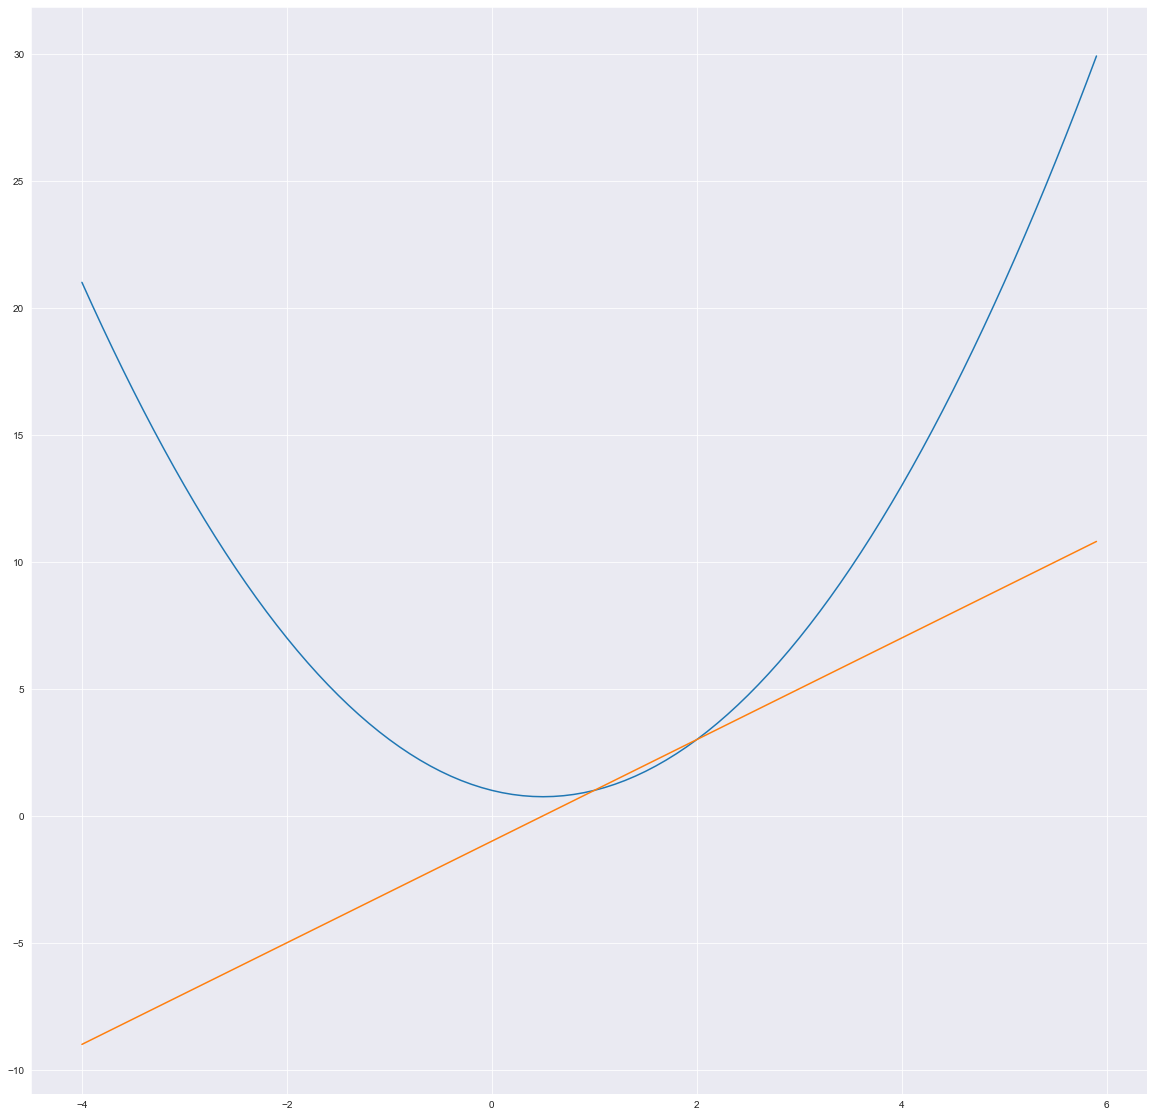

In [3]:
X = np.arange(-40, 60) / 10
fig = plt.figure(figsize=(20, 20))
plt.plot(X, [f(x) for x in X])
plt.plot(X, [ff(x) for x in X])

In [4]:
eta = .3 # 𝜂 : Coefficient pour f'(x)
erreur = 0
x = 50 # x de départ

while abs(ff(x)) > erreur: # Tant que |f'(x)| n'est pas très proche de zéro
    x -= eta * ff(x) # On fait varier x
    print('Etape -> x: %s, f(x): %s, f\'(x): %s' % (x, f(x), ff(x)))

print('Resultat -> x: %s, f(x): %s, f\'(x): %s' % (x, f(x), ff(x)))
    

Etape -> x: 20.3, f(x): 392.79, f'(x): 39.6
Etape -> x: 8.42, f(x): 63.4764, f'(x): 15.84
Etape -> x: 3.668, f(x): 10.786224, f'(x): 6.336
Etape -> x: 1.7672, f(x): 2.35579584, f'(x): 2.5344
Etape -> x: 1.0068800000000002, f(x): 1.0069273344000003, f'(x): 1.0137600000000004
Etape -> x: 0.702752, f(x): 0.7911083735040001, f'(x): 0.4055040000000001
Etape -> x: 0.5811008, f(x): 0.75657733976064, f'(x): 0.16220159999999995
Etape -> x: 0.53244032, f(x): 0.7510523743617024, f'(x): 0.06488063999999993
Etape -> x: 0.512976128, f(x): 0.7501683798978724, f'(x): 0.025952256000000062
Etape -> x: 0.5051904512000001, f(x): 0.7500269407836595, f'(x): 0.010380902400000114
Etape -> x: 0.50207618048, f(x): 0.7500043105253855, f'(x): 0.0041523609600000455
Etape -> x: 0.500830472192, f(x): 0.7500006896840616, f'(x): 0.001660944384000107
Etape -> x: 0.5003321888768, f(x): 0.7500001103494498, f'(x): 0.000664377753599954
Etape -> x: 0.50013287555072, f(x): 0.750000017655912, f'(x): 0.0002657511014398928
Etap

# Gradient 2D

In [5]:
def f(x, y):
    return  - pow(pow(np.cos(x),2) + pow(np.cos(y),2),2) # −(cos²x + cos²y)²

def sx(x, y):
    return 4*np.sin(x)*np.cos(x)*(pow(np.cos(x),2)+pow(np.cos(y),2)) # 𝜕(x, y)/𝜕(x) = 4sin(x)cos(x)(cos2(x) + cos2(y))

def sy(x, y):
    return 4*np.sin(y)*np.cos(y)*(pow(np.cos(x),2)+pow(np.cos(y),2)) # 𝜕(x, y)/𝜕(y) = 4sin(y)cos(y)(cos2(x) + cos2(y))


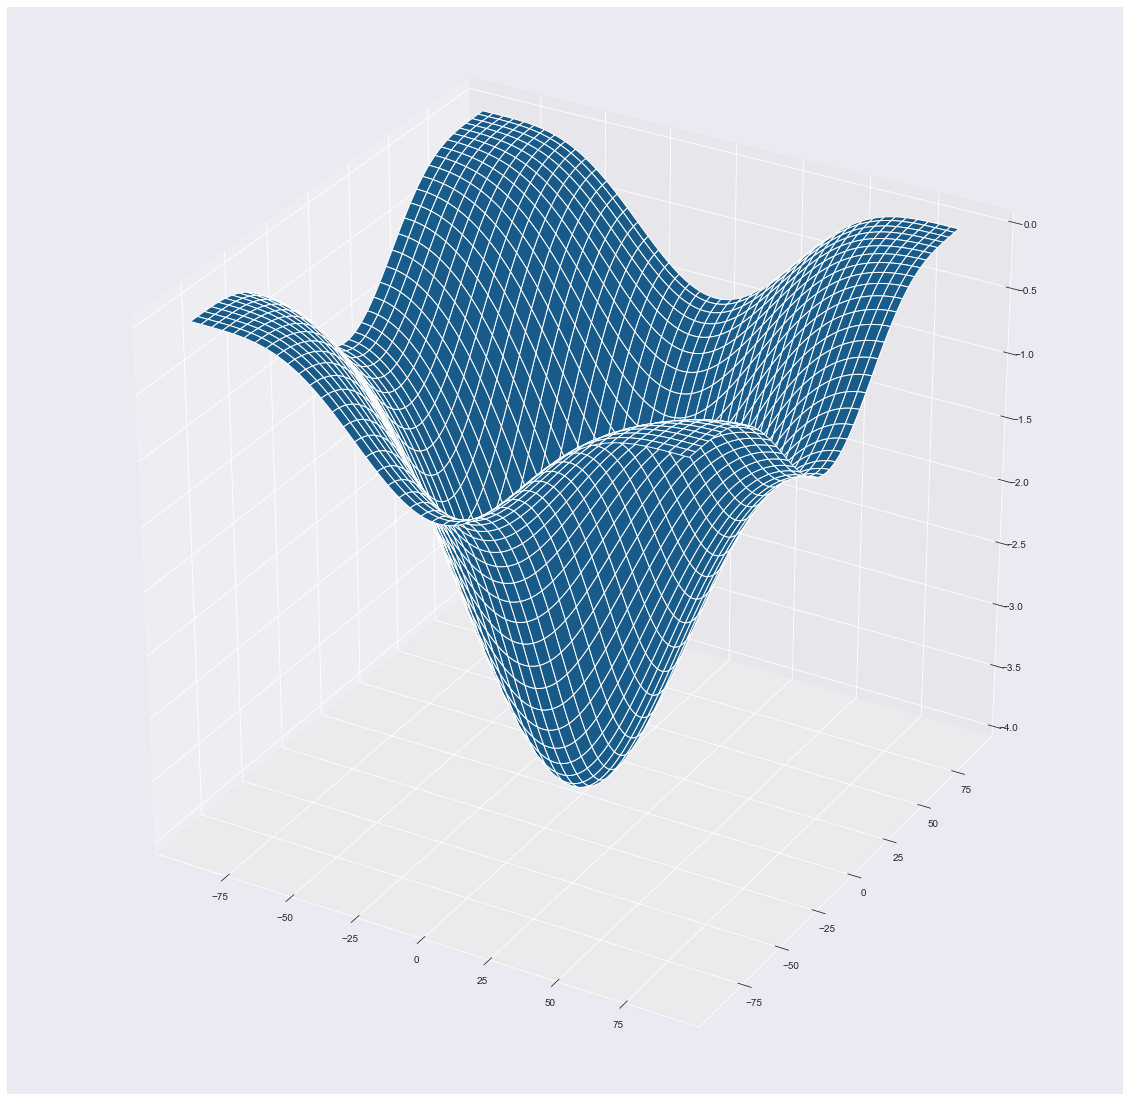

In [6]:
 x = y = np.radians(np.arange(-90, 90) ) 
X, Y = np.meshgrid(x, y)
Z = np.array(f(np.ravel(X), np.ravel(Y))).reshape(X.shape)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.degrees(X), np.degrees(Y), Z)

In [7]:
eta = .05 # 𝜂 : Coefficient pour 𝜕(x, y)/𝜕(x) zt  𝜕(x, y)/𝜕(y)
erreur = .01
x = np.radians(50) # x de départ
y = np.radians(20) # y de départ

while abs(sx(x, y)) + abs(sy(x, y)) > erreur: # Tant que |Somme des dérivées partielles| est superieur erreur
    x += eta * sx(x, y) # on fait varier le x de départ
    y += eta * sy(x, y) # on fait varier le y de départ
    print('Etape -> x: %s, y: %s, f(x,y): %s, sxy : %s' % (np.degrees(x), np.degrees(y), f(x, y), abs(sx(x, y) + abs(sy(x, y)))))

print('Resultat -> x: %s, y: %s, f(x,y): %s, sxy : %s' % (np.degrees(x), np.degrees(y), f(x, y), abs(sx(x, y) + abs(sy(x, y)))))


Etape -> x: 57.313840463568205, y: 24.326165480319048, f(x,y): -1.2587790510237296, sxy : 3.7243229677047474
Etape -> x: 63.15740624282072, y: 28.774558651830898, f(x,y): -0.9451289879022172, sxy : 3.207460222339334
Etape -> x: 67.64570826199169, y: 33.18855093643213, f(x,y): -0.7140428570305566, sxy : 2.7373337137499707
Etape -> x: 71.05174714859034, y: 37.41854481191771, f(x,y): -0.5420220138745234, sxy : 2.3256102971979984
Etape -> x: 73.64274541187771, y: 41.34544856413682, f(x,y): -0.41335142791312257, sxy : 1.970340813331044
Etape -> x: 75.63360489406264, y: 44.89833394240521, f(x,y): -0.3173506136705031, sxy : 1.668293079631094
Etape -> x: 77.18523922277302, y: 48.05513685503439, f(x,y): -0.245990139399728, sxy : 1.4153798826901223
Etape -> x: 78.41442678931934, y: 50.830227391838335, f(x,y): -0.1929647215395384, sxy : 1.2061167909832733
Etape -> x: 79.40476410046676, y: 53.25854532004624, f(x,y): -0.1533954945478999, sxy : 1.0341356375546
Etape -> x: 80.21591306483045, y: 55.38

# Gradient nD

In [8]:
"""
    f : la fonction pour laquelle on cherche le minimum/maximum
    V : le vecteur d'entrée
    S : le vecteur des dérivés partielles de f (la taille de V et S doit être égale !)
    d : -1 ou 1, la direction vers laquelle on veut regresser/progresser
    eta : le coefficient à appliquer à notre regression/progression
    err : la marge d'erreur admise (proche de 0, 0 tournera surement en boucle)
"""
def n_gradient(f, V, S, d, eta, err):
    while True:
        _s = np.array([s(V) for s in S]) # On applique le vecteur de fonction S (les dérivées partielle) à notre vecteur d'entrée
        V += d * _s * eta # on ajoute aux entrées le résultat * la direction * le coefficient
        print('%s - %s - %s'%(V, _s, _s.sum()))
        if (
            np.absolute(_s).sum() <= err or # si la somme des valeurs absolues des dérivés partielles est inferieur ou égal à la marge d'erreur acceptée
            np.absolute(V.sum()) == np.inf # Si la fonction tant vers l'infini dans la direction d, on ne trouvera pas de maximum/minimum
        ): 
            return V, _s # On retourne le V d'entrée et la marge d'erreur
        
res, err = n_gradient(
    lambda x: - pow(pow(np.cos(x[0]),2) + pow(np.cos(y[0]),2),2),
    np.array((np.radians(50),np.radians(20))),
    (
        lambda x: 4*np.sin(x[0])*np.cos(x[0])*(pow(np.cos(x[0]),2)+pow(np.cos(x[1]),2)),
        lambda x: 4*np.sin(x[1])*np.cos(x[1])*(pow(np.cos(x[0]),2)+pow(np.cos(x[1]),2))
    ),
    -1,
    .05,
    .01
)
print('res : %s, err : %s' % (np.degrees(res), err))


[0.74501403 0.26574784] - [2.55301194 1.6663602 ] - 4.219372139927304
[0.59835717 0.19117563] - [2.93313722 1.49144425] - 4.424581466212852
[0.44508411 0.12974034] - [3.06546126 1.22870572] - 4.294166984863542
[0.30535516 0.08361001] - [2.79457887 0.92260672] - 3.71718559554835
[0.19624801 0.05194202] - [2.18214301 0.63335962] - 2.8155026282032907
[0.12130625 0.03162479] - [1.49883517 0.40634472] - 1.9051798934441573
[0.07363417 0.01908218] - [0.95344164 0.25085215] - 1.2042937895091743
[0.04437161 0.0114732 ] - [0.58525119 0.1521796 ] - 0.7374307902458458
[0.02666486 0.00688914] - [0.35413506 0.09168122] - 0.44581628646520666
[0.01600801 0.00413462] - [0.21313692 0.05509048] - 0.26822739903051074
[0.00960678 0.00248101] - [0.12802472 0.03307203] - 0.16109674851924674
[0.00576449 0.00148866] - [0.0768457  0.01984706] - 0.09669275284471919
[0.00345879 0.00089321] - [0.04611409 0.01190906] - 0.05802315371613674
[0.00207529 0.00053593] - [0.0276699  0.00714562] - 0.03481551313098506
[0.00

# Exemple pour : f(x,y) = (x-2)²+(y-1)²

In [11]:
print(n_gradient(
    lambda x: (float)(pow((x[0]-2), 2) + pow((x[1]-1), 2)),
    np.array((3.0, 6.0)),
    (
        lambda x: (float)(2 * (x[0]-2)),
        lambda x: (float)(2 * (x[1]-1))
    ),
    -1,
    .1,
    .01    
))

[2.8 5. ] - [ 2. 10.] - 12.0
[2.64 4.2 ] - [1.6 8. ] - 9.6
[2.512 3.56 ] - [1.28 6.4 ] - 7.68
[2.4096 3.048 ] - [1.024 5.12 ] - 6.143999999999999
[2.32768 2.6384 ] - [0.8192 4.096 ] - 4.9152
[2.262144 2.31072 ] - [0.65536 3.2768 ] - 3.9321599999999997
[2.2097152 2.048576 ] - [0.524288 2.62144 ] - 3.145728
[2.16777216 1.8388608 ] - [0.4194304 2.097152 ] - 2.5165824
[2.13421773 1.67108864] - [0.33554432 1.6777216 ] - 2.01326592
[2.10737418 1.53687091] - [0.26843546 1.34217728] - 1.6106127360000002
[2.08589935 1.42949673] - [0.21474836 1.07374182] - 1.2884901888
[2.06871948 1.34359738] - [0.17179869 0.85899346] - 1.03079215104
[2.05497558 1.27487791] - [0.13743895 0.68719477] - 0.8246337208320003
[2.04398047 1.21990233] - [0.10995116 0.54975581] - 0.6597069766655999
[2.03518437 1.17592186] - [0.08796093 0.43980465] - 0.5277655813324795
[2.0281475  1.14073749] - [0.07036874 0.35184372] - 0.42221246506598353
[2.022518   1.11258999] - [0.056295   0.28147498] - 0.33776997205278647
[2.0180144 

# Exemple pour : f(x,y) = (x+3)²+(y-1)²

In [12]:
print(n_gradient(
    lambda x: (float)(pow((x[0]+3.0), 2) + pow((x[1]-1), 2)),
    np.array((2.0, 3.0)),
    (
        lambda x: (float)(2 * (x[0]+3.0)),
        lambda x: (float)(2 * (x[1]-1))
    ),
    -1,
    .1,
    .01    
))

[1.  2.6] - [10.  4.] - 14.0
[0.2  2.28] - [8.  3.2] - 11.2
[-0.44   2.024] - [6.4  2.56] - 8.96
[-0.952   1.8192] - [5.12  2.048] - 7.167999999999999
[-1.3616   1.65536] - [4.096  1.6384] - 5.7344
[-1.68928   1.524288] - [3.2768  1.31072] - 4.58752
[-1.951424   1.4194304] - [2.62144  1.048576] - 3.6700159999999995
[-2.1611392   1.33554432] - [2.097152  0.8388608] - 2.9360128
[-2.32891136  1.26843546] - [1.6777216  0.67108864] - 2.3488102399999997
[-2.46312909  1.21474836] - [1.34217728 0.53687091] - 1.8790481919999995
[-2.57050327  1.17179869] - [1.07374182 0.42949673] - 1.5032385535999997
[-2.65640262  1.13743895] - [0.85899346 0.34359738] - 1.2025908428799994
[-2.72512209  1.10995116] - [0.68719477 0.27487791] - 0.9620726743039993
[-2.78009767  1.08796093] - [0.54975581 0.21990233] - 0.7696581394431998
[-2.82407814  1.07036874] - [0.43980465 0.17592186] - 0.61572651155456
[-2.85926251  1.056295  ] - [0.35184372 0.14073749] - 0.49258120924364857
[-2.88741001  1.045036  ] - [0.2814749

# numpy.gradient()
https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html
# sklearn
https://scikit-learn.org/stable/index.html
